# 10. Green function for tight-binding lattice model

`read_wann90()` reads a file of the wannier90-like format and returns the real-space tight-binding Hamiltonian as an array (vector).

$$
G(k,\omega) = [ \omega - \epsilon_k ] ^{-1}
$$

In [4]:
# ENV["PROJECT_PATH_ED"]="../envs/KED"
# include("../src/mybase.jl")

using KaiEDJ
using KaiEDJ: I, Plots, read_wann90


In [2]:

hr  = read_wann90( "ex_wann_1d_2sites.dat" )

@show hr
@show typeof(hr)

for (i,hri) in Iterators.enumerate(hr)
    @show (i,hri)
end

hr = [(0, 0, 0, 1, 2, -1.0, 0.0), (0, 0, 0, 2, 1, -1.0, 0.0), (1, 0, 0, 2, 1, -1.0, 0.0), (-1, 0, 0, 1, 2, -1.0, 0.0)]
typeof(hr) = Vector{Tuple{Int64, Int64, Int64, Int64, Int64, Float64, Float64}}
(i, hri) = (1, (0, 0, 0, 1, 2, -1.0, 0.0))
(i, hri) = (2, (0, 0, 0, 2, 1, -1.0, 0.0))
(i, hri) = (3, (1, 0, 0, 2, 1, -1.0, 0.0))
(i, hri) = (4, (-1, 0, 0, 1, 2, -1.0, 0.0))


hk = Matrix{ComplexF64}[[0.0 + 0.0im -1.999999999958821 - 9.075124744112121e-6im; -1.999999999958821 + 9.075124744112121e-6im 0.0 + 0.0im], [0.0 + 0.0im -1.9999999988568058 - 4.7816193393317674e-5im; -1.9999999988568058 + 4.7816193393317674e-5im 0.0 + 0.0im], [0.0 + 0.0im -1.999999993095236 - 0.00011751394844241111im; -1.999999993095236 + 0.00011751394844241111im 0.0 + 0.0im], [0.0 + 0.0im -1.9999999761980491 - 0.00021818318237206279im; -1.9999999761980491 + 0.00021818318237206279im 0.0 + 0.0im], [0.0 + 0.0im -1.9999999388113041 - 0.0003498247960897163im; -1.9999999388113041 + 0.0003498247960897163im 0.0 + 0.0im], [0.0 + 0.0im -1.999999868703671 - 0.0005124379385347862im; -1.999999868703671 + 0.0005124379385347862im 0.0 + 0.0im], [0.0 + 0.0im -1.9999997507670395 - 0.0007060211462170335im; -1.9999997507670395 + 0.0007060211462170335im 0.0 + 0.0im], [0.0 + 0.0im -1.9999995670172674 - 0.000930572553611153im; -1.9999995670172674 + 0.000930572553611153im 0.0 + 0.0im], [0.0 + 0.0im -1.999999

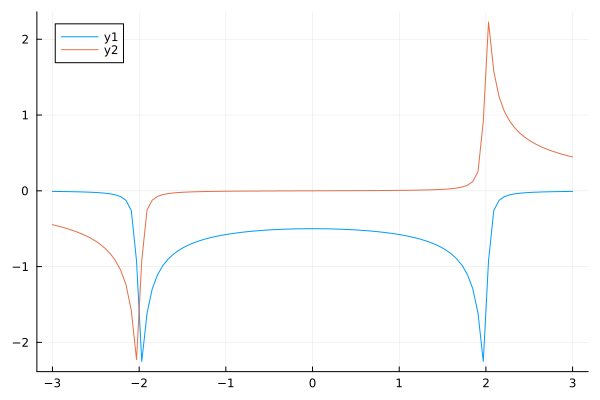

In [8]:
nk      = 1000
# karr    = [ [x,0,0] for x in LinRange(0,2*pi,nk) ]
# wkarr   = [ 1. for x in LinRange(0,2*pi,nk) ]
xarr, wkarr = KaiEDJ.gausslegendre( nk )
karr    = [ [(x .+ 1) * pi, 0,0] for x in xarr ]
wkarr   = wkarr / 2.        # integrate an unit volume

norb    = 2
hk  = hr_to_hk( hr, norb, karr ; ISPIN=2 )        # Default (ISPIN=1) : dim(hk) = 2*norb   (with spin-doubling onto spinless wannier functions)
@show hk

for hki in hk
    @show hki
end

NReFreq   = 100
ReFreqGridVal   = collect(LinRange( -3, 3, NReFreq ))
epsilon         = 0.03
ReFreqGrid      = ReFreqGridVal .+ im * epsilon

chem    = collect( 0.0 * I(norb) ) 
glocal_w  = KaiEDJ.GetGreenLocalFromHkGrid( hk, wkarr, ReFreqGrid, chem )     # chemical potential convection : H_chem = - mu * N
gdiag_w = [ [ g[i,i] for g in glocal_w ] for i in 1:norb ]




p_g     = Plots.plot(  ReFreqGridVal, imag(gdiag_w[1]) )
p_g     = Plots.plot!( ReFreqGridVal, real(gdiag_w[1]) )

  1.445994 seconds (3.49 M allocations: 386.100 MiB, 5.93% gc time, 83.71% compilation time)
hyblatt_w obtained.
  0.091587 seconds (85.68 k allocations: 4.347 MiB, 99.67% compilation time)
hyblattdiag_w obtained.


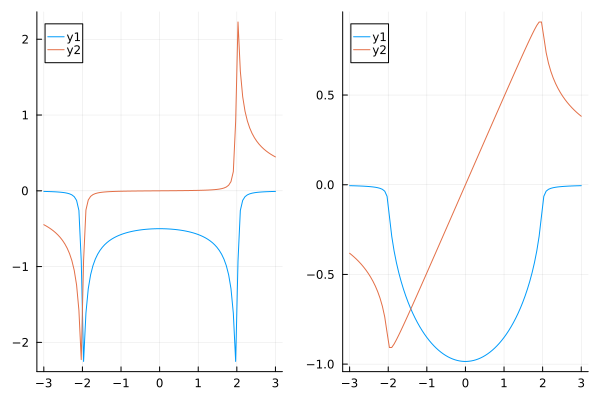

In [12]:
Eorb    = collect( 0.0 * I(norb) ) 

@time hyblatt_w  = KaiEDJ.GetHybFromGreenLocalFromHkGrid( hk, wkarr, ReFreqGrid, chem, Eorb )     # Approx. : inv(g0) = omega - Eorb + chem - Delta_hyb
println("hyblatt_w obtained.") ; flush(stdout)
@time hyblattdiag_w = [ [ g[i,i] for g in hyblatt_w ] for i in 1:norb ]
println("hyblattdiag_w obtained.") ; flush(stdout)

p_h     = Plots.plot(  ReFreqGridVal, imag(hyblattdiag_w[1]) )
p_h     = Plots.plot!( ReFreqGridVal, real(hyblattdiag_w[1]) )

Plots.plot( p_g, p_h )

In [14]:

#### Matsubara Green Function Setup ####
beta    = 128
NImFreq  = 1*beta
ImFreqGridVal   = KaiEDJ.GetImFreqValGrid( beta, NImFreq )
ImFreqGrid      = ImFreqGridVal * im

@time hyblatt_iw  = KaiEDJ.GetHybFromGreenLocalFromHkGrid( hk, wkarr, ImFreqGrid, chem, Eorb )
println("hyblatt_iw obtained.") ; flush(stdout)
@time hyblattdiag_iw = [ [ g[i,i] for g in hyblatt_iw ] for i in 1:norb ]
println("hyblattdiag_iw obtained.") ; flush(stdout)

  0.303686 seconds (2.56 M allocations: 397.867 MiB, 24.24% gc time)
hyblatt_iw obtained.
  0.109750 seconds (85.68 k allocations: 4.348 MiB, 99.67% compilation time)
hyblattdiag_iw obtained.
